In [32]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [33]:
path = '/Users/alextemnorod/Downloads/chromedriver-mac-arm64/chromedriver'
url = 'https://www.uniqlo.com/us/en/men/tops/sweatshirts-and-hoodies'
service = Service(executable_path=path)
driver = webdriver.Chrome(service=service)

driver.get(url)

products = driver.find_elements(By.XPATH, '//a[@class="link ito-padding-horizontal-0 ito-padding-vertical-0 ec-link product-tile__link"]')

data = []

for product in products:
    try:
        title = product.find_element(By.XPATH, './/div[contains(@class, "ito-font-size-17")]').text
    except:
        title = "N/A"

    try:
        price = product.find_element(By.XPATH, './/div[contains(@class, "ito-font-size-20")]').text
    except:
        price = "N/A"

    try:
        review = product.find_element(By.XPATH, './/div[contains(@class, "fr-ec-rating-static__average-value")]').text
    except:
        review = "N/A"

    data.append({
        "title": title,
        "price": price,
        "review": review
    })

driver.quit()

In [34]:
for item in data:
    print(item)
df = pd.DataFrame(data)
df

{'title': 'Sweat Oversized Pullover Hoodie', 'price': '$49.90', 'review': '4.8'}
{'title': 'Sweat Pullover Hoodie', 'price': '$39.90', 'review': '4.7'}
{'title': 'Washable 3D Knit Hoodie', 'price': '$39.90', 'review': '4.4'}
{'title': 'Sweat Full-Zip Hoodie', 'price': '$39.90', 'review': '4.8'}
{'title': 'Sweat Full-Zip Hoodie', 'price': '$29.90', 'review': '4.8'}
{'title': 'DRY-EX UV Protection Full-Zip Hoodie | Printed', 'price': '$39.90', 'review': '4.7'}
{'title': 'Half-Zip Sweatshirt', 'price': '$49.90', 'review': '4.8'}
{'title': 'DRY-EX UV Protection Full-Zip Hoodie', 'price': '$39.90', 'review': '4.8'}
{'title': 'DRY-EX UV Protection Full-Zip Hoodie', 'price': '$19.90', 'review': '4.8'}
{'title': 'Sweatshirt', 'price': '$34.90', 'review': '4.6'}
{'title': 'Oversized Sweatshirt', 'price': '$49.90', 'review': '5'}
{'title': 'Sweatshirt', 'price': '$19.90', 'review': '4.6'}
{'title': 'STUDIO GHIBLI Sweatshirt | My Neighbor Totoro', 'price': '$39.90', 'review': '4.7'}
{'title': 'ST

,title,price,review
0,Sweat Oversized Pullover Hoodie,$49.90,4.8
1,Sweat Pullover Hoodie,$39.90,4.7
2,Washable 3D Knit Hoodie,$39.90,4.4
3,Sweat Full-Zip Hoodie,$39.90,4.8
4,Sweat Full-Zip Hoodie,$29.90,4.8
5,DRY-EX UV Protection Full-Zip Hoodie | Printed,$39.90,4.7
6,Half-Zip Sweatshirt,$49.90,4.8
7,DRY-EX UV Protection Full-Zip Hoodie,$39.90,4.8
8,DRY-EX UV Protection Full-Zip Hoodie,$19.90,4.8
9,Sweatshirt,$34.90,4.6


R² = 0.0918


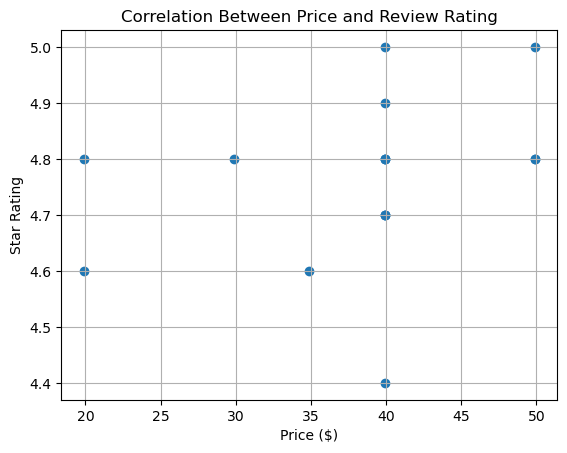

Interpretation: Very weak or no correlation


In [35]:
df['price'] = df['price'].str.replace('$', '').astype(float)

# Clean 'review' column: keep only the star rating (before any space or parenthesis)
df['review'] = df['review'].str.extract(r'([0-9.]+)').astype(float)

# Drop rows with missing or invalid data
df.dropna(subset=['price', 'review'], inplace=True)

slope, intercept, r_value, p_value, std_err = linregress(df['price'], df['review'])
r_squared = r_value**2

print(f"R² = {r_squared:.4f}")

# Plot price vs review
plt.scatter(df['price'], df['review'])
plt.xlabel('Price ($)')
plt.ylabel('Star Rating')
plt.title('Correlation Between Price and Review Rating')
plt.grid(True)
plt.show()

def interpret_r_squared(r2):
    if r2 >= 0.8:
        return "Very strong correlation"
    elif r2 >= 0.6:
        return "Strong correlation"
    elif r2 >= 0.4:
        return "Moderate correlation"
    elif r2 >= 0.2:
        return "Weak correlation"
    else:
        return "Very weak or no correlation"

correlation_strength = interpret_r_squared(r_squared)
print("Interpretation:", correlation_strength)